In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Plots import lens_plot
from matplotlib import cm
from lenstronomy.Util import util
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
from lenstronomy.LightModel.light_model import LightModel
from matplotlib import animation

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 12})



numpix=700
xx,yy = util.make_grid(numpix, deltapix=0.1)
theta_E_1= 4
theta_E_2=6

d=5

lens_model_list=['POINT_MASS','POINT_MASS']
lens=LensModel(lens_model_list)
lensext=LensModelExtensions(lens)
pointmass1_params={'theta_E':theta_E_1,'center_x':d, 'center_y':0} #thetaE en arcosegundos 0.00010090910723578977#
pointmass2_params={'theta_E':theta_E_2,'center_x':0, 'center_y':0}  
kwargs=[pointmass1_params,pointmass2_params]


xs,ys=lens.ray_shooting(x=xx,y=yy,kwargs=kwargs)
t0=70
tE=10
theta=-np.pi*0.5/4
y0=7
def SourcePos(t):
    p=(t-t0)/tE
    xsource=np.cos(theta)*p-np.sin(theta)*y0
    ysource=np.sin(theta)*p+np.cos(theta)*y0
    return(xsource,ysource)
    
criticalra,criticalde,causticsra,causticsd=lensext.critical_curve_caustics(kwargs,compute_window=30)


700
AxesImage(shape=(700, 700))
AxesImage(shape=(700, 700))


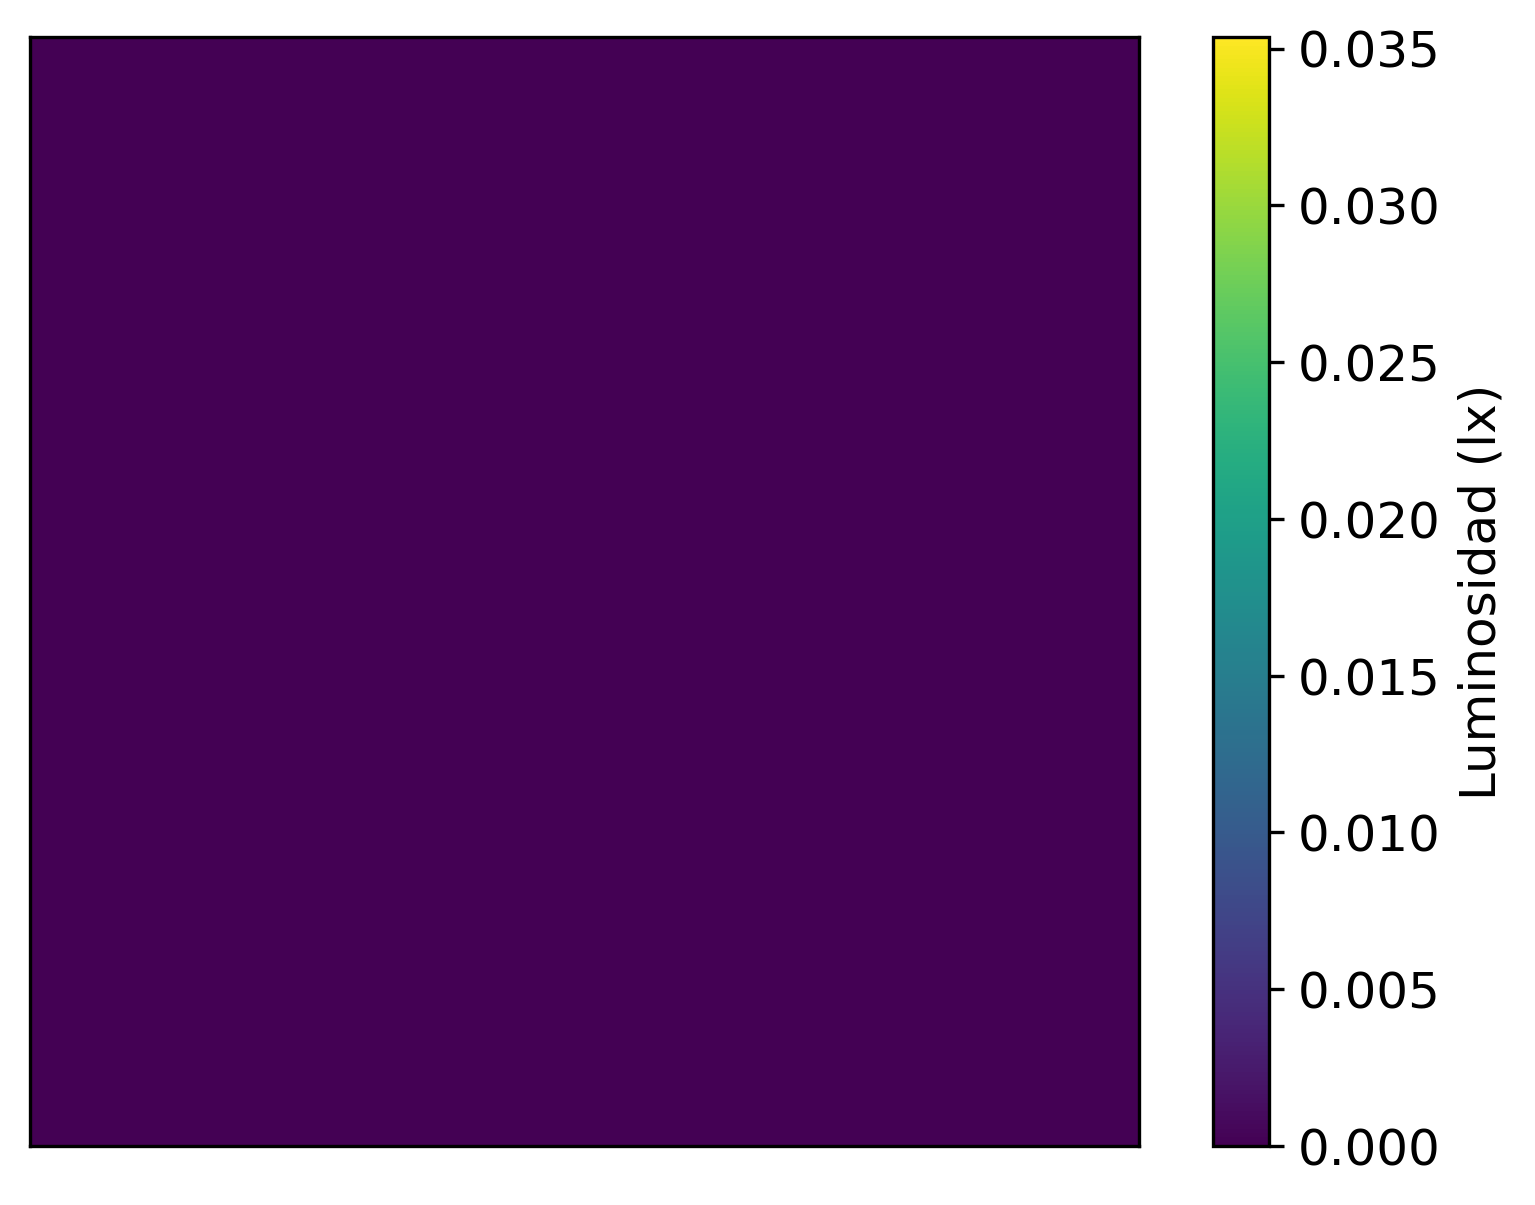

AxesImage(shape=(700, 700))
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [5]:
from lenstronomy.LightModel.light_model import LightModel
ligth = LightModel(light_model_list=['ELLIPSOID'])
t=np.linspace(-50,300,100)
f, ax = plt.subplots()
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
xpos= SourcePos(t[0])[0]
ypos=SourcePos(t[0])[1]
kwargs_light = [{'amp': 1, 'radius': 3, 'e1': 0, 'e2': 0, 'center_x': xpos, 'center_y': ypos}]
surface_brightness = ligth.surface_brightness(xs, ys, kwargs_light)
image = util.array2image(surface_brightness)
cax=ax.imshow(image)
f.colorbar(cax,label='Luminosidad (lx)')
print(len(image))

def init():
    cax.set_data(np.zeros((len(image), len(image))))
    print(cax)
    return [cax]

def animate(i):   
    xpos= SourcePos(t[i])[0]
    ypos=SourcePos(t[i])[1]
    kwargs_light = [{'amp': 1, 'radius': 3, 'e1': 0, 'e2': 0, 'center_x': xpos, 'center_y': ypos}]
    surface_brightness = ligth.surface_brightness(xs, ys, kwargs_light)
    image = util.array2image(surface_brightness)
    cax.set_data(image)
    print(i)
    return [cax]

ani = animation.FuncAnimation(f, animate, frames=len(t),init_func=init, blit=True)

# Display the animation
plt.show()

# To save the animation, you can use:
# ani.save('matrix_animation.mp4', writer='ffmpeg')
writergif = animation.PillowWriter(fps=30)
ani.save('filename.gif',writer=writergif)

#writermp4 = animation.FFMpegWriter(fps=30)
#ani.save('filename.mp4', writer=writermp4)

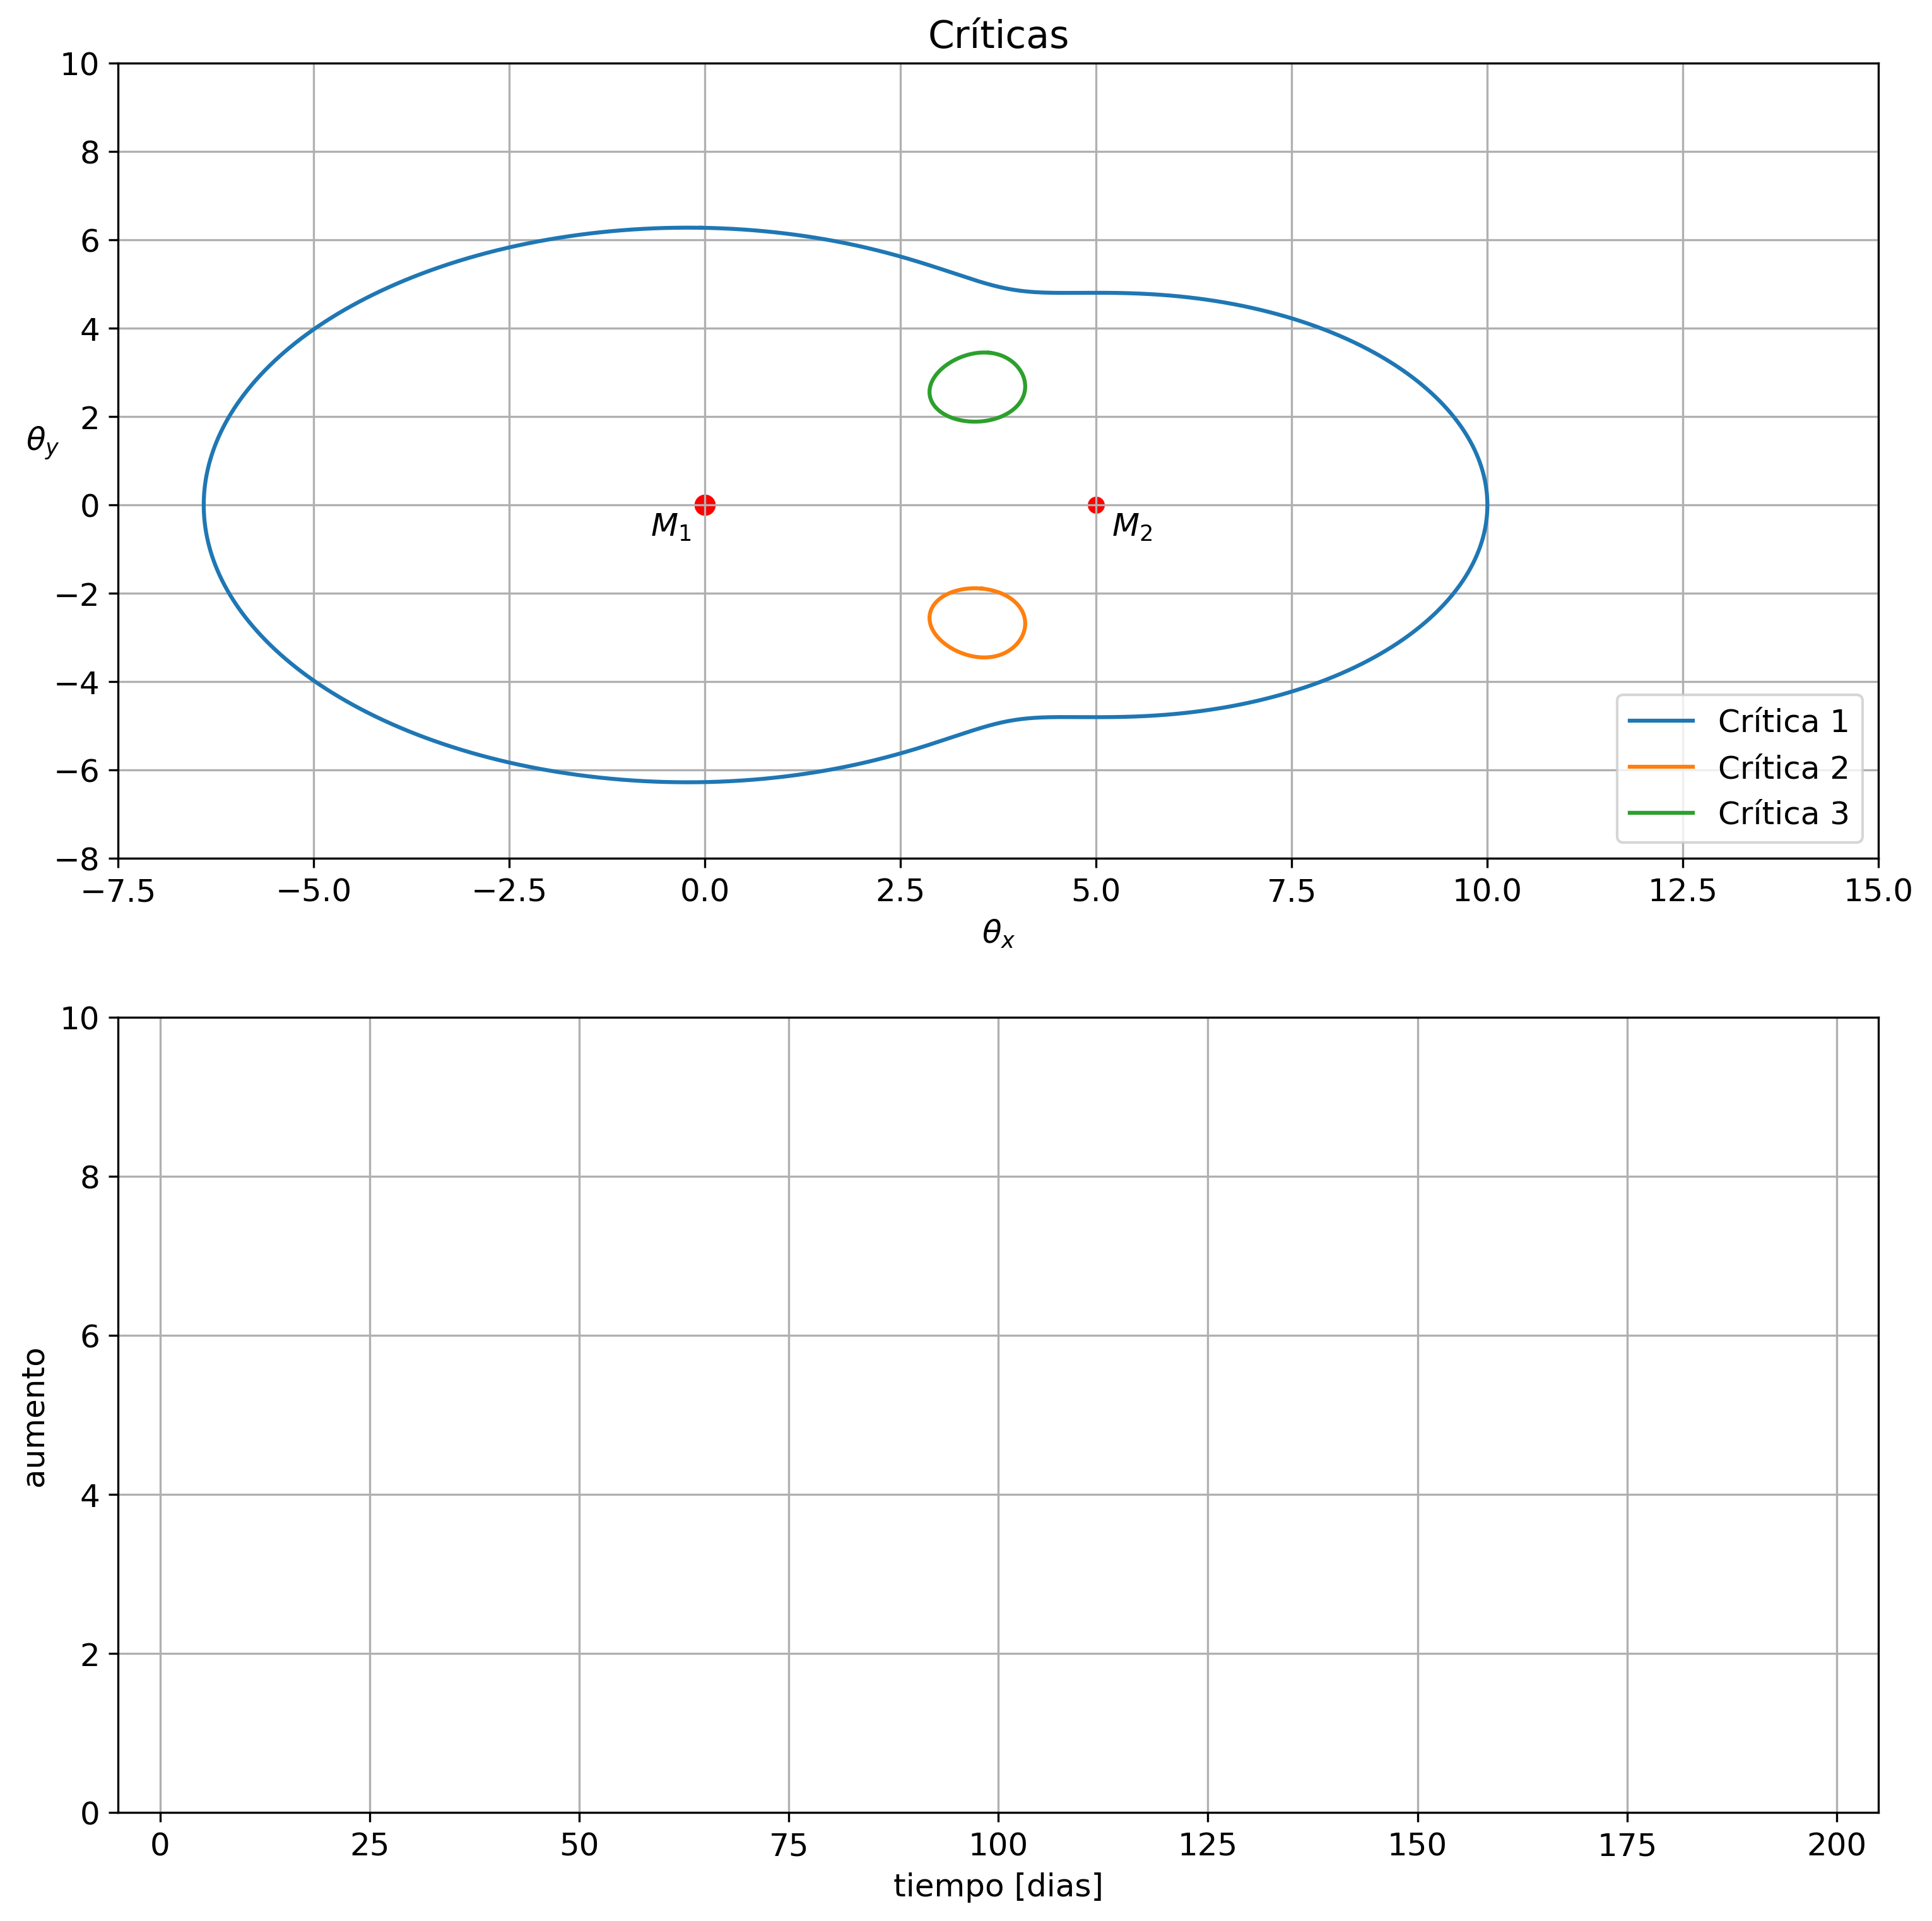

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [4]:
#ploteamos la caustica
fig,ax=plt.subplots(2,1,figsize=(12,12))
for i in range(len(criticalra)):
    ax[0].plot(criticalra[i], criticalde[i], label=f'Crítica {i+1}')
ax[0].set_xlabel(r'$\theta_x$')
ax[0].set_ylabel(r'$\theta_y$',rotation=0)
ax[0].set_title('Críticas')
ax[0].legend(loc='lower right')
ax[0].grid(True)
ax[0].set(xlim=[-7.5,15],ylim=[-8,10])
ax[0].scatter([0],[0],s=50,c='red')
ax[0].scatter([d],[0],s=30,c='red')
ax[0].text(-0.7, -0.7, '$M_1$', fontsize = 12)
ax[0].text(d+0.2, -0.7, '$M_2$', fontsize = 12)


ax[1].grid(True)
ax[1].set_xlabel('tiempo [dias]')
ax[1].set_ylabel('aumento')
ax[1].set(xlim=[-5,205],ylim=[0,10])
t=np.linspace(-5,205,200)
lightcurve=[]
xc=[]
yc=[]
for i in range(len(t)):
    xcord=SourcePos(t[i])[0]
    ycord=SourcePos(t[i])[1]
    xc.append(xcord)
    yc.append(ycord)
    magt=lens.magnification(xcord,ycord,kwargs)
    lightcurve.append(magt)
    
#ploteo puntos iniciales
plt1=ax[0].plot(xc[0],yc[0],)[0]
plt2=ax[1].plot(t[0],lightcurve[0])[0]
plt.show()

def update(frame):
    # for each frame, update the data stored on each artist.
    tax = t[:frame]
    xcax = xc[:frame]
    ycax = yc[:frame]
    # update the line plot:
    plt2.set_xdata(tax)
    plt2.set_ydata(lightcurve[:frame])
    plt1.set_xdata(xcax)
    plt1.set_ydata(ycax)
    print(frame)
    return [plt1, plt2]

writergif = animation.PillowWriter(fps=30)
ani2 = animation.FuncAnimation(fig=fig, func=update, frames=len(t))
plt.show()
ani2.save('filename2.gif',writer=writergif)


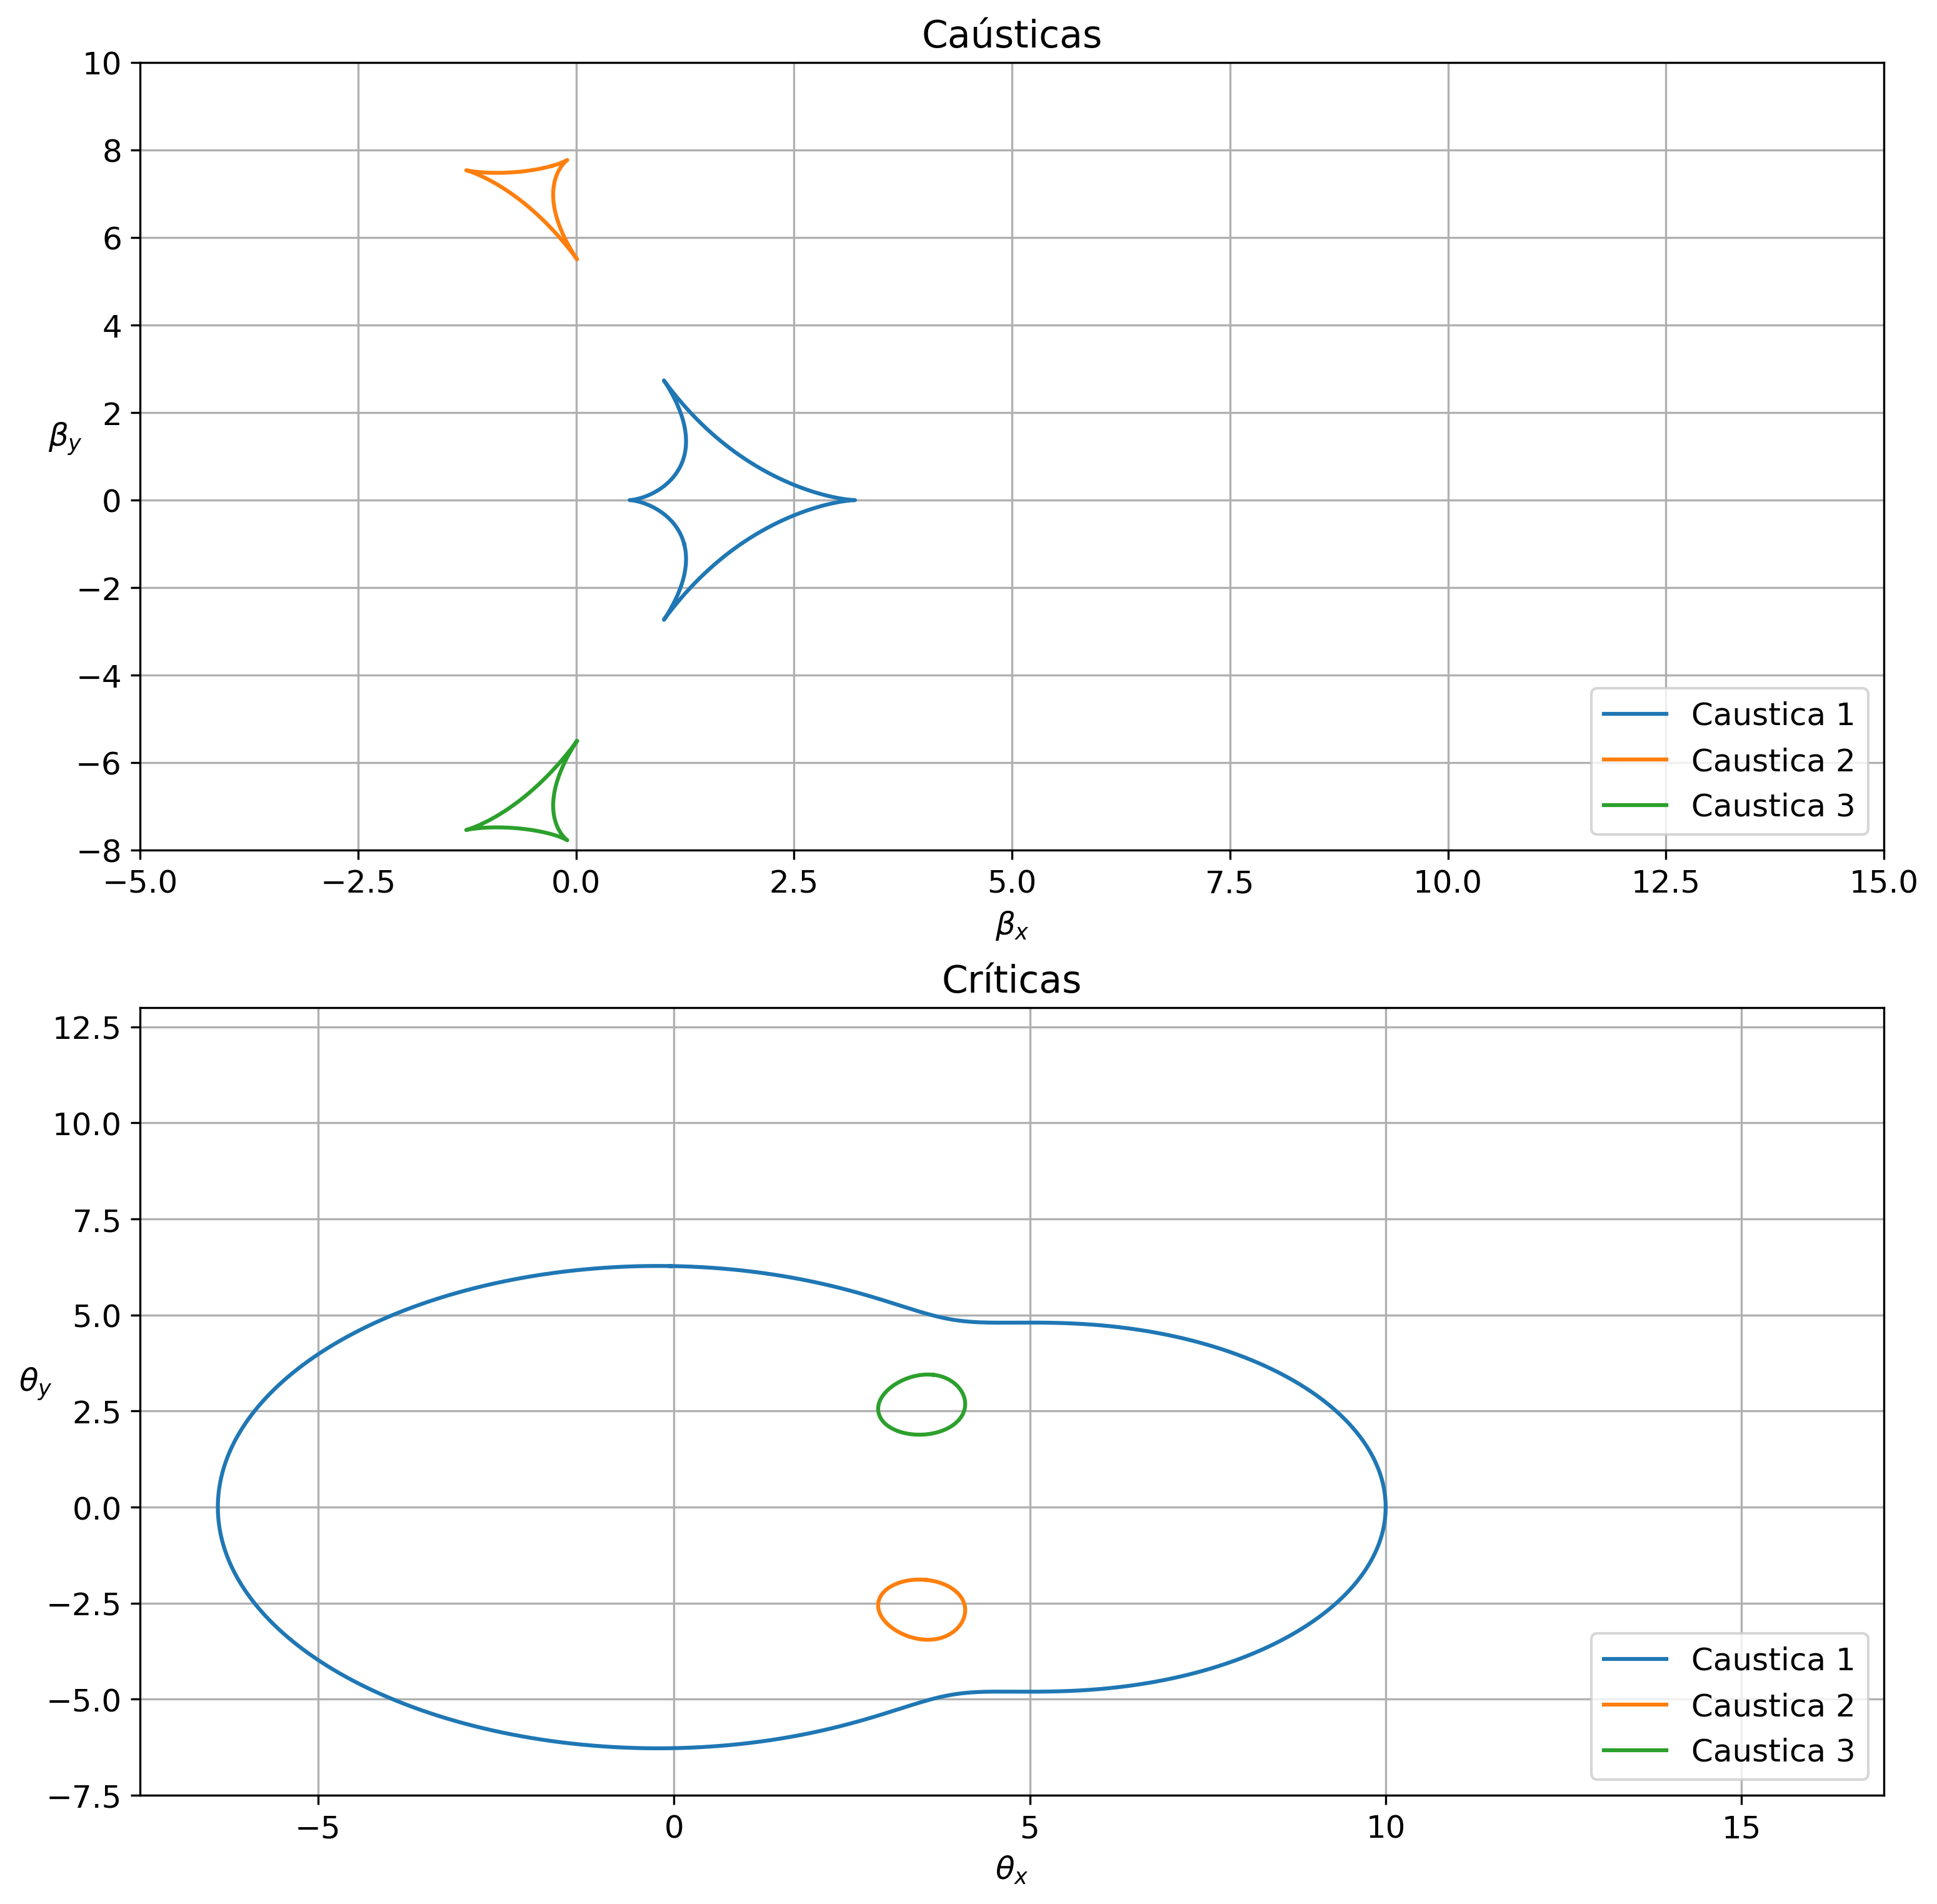

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [15]:
#Posicion imagenes
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
solver=LensEquationSolver(lens)
ximl=[]
yiml=[]
def flatten(xss):
    return [x for xs in xss for x in xs]
for i in range(len(xc)):
    x,y=solver.image_position_lenstronomy(xc[i], yc[i], kwargs,search_window=30,num_iter_max=100)
    ximl.append(x)
    yiml.append(y)
ximl=flatten(ximl)
yiml=flatten(yiml)


fig,ax=plt.subplots(2,1,figsize=(12,12))
for i in range(len(criticalra)):
    ax[1].plot(criticalra[i], criticalde[i], label=f'Crítica {i+1}')
ax[1].set_xlabel(r'$\theta_x$')
ax[1].set_ylabel(r'$\theta_y$',rotation=0)
ax[1].set_title('Críticas')
ax[1].legend(loc='lower right')
ax[1].grid(True)
ax[1].set(xlim=[-7.5,17],ylim=[-7.5,13])

for i in range(len(causticsra)):
    ax[0].plot(causticsra[i], causticsd[i], label=f'Caustica {i+1}')
ax[0].set_xlabel(r'$\beta_x$')
ax[0].set_ylabel(r'$\beta_y$',rotation=0)
ax[0].set_title('Caústicas')
ax[0].legend(loc='lower right')
ax[0].grid(True)
ax[0].set(xlim=[-5,15],ylim=[-8,10])

t=np.linspace(-50,300,200)

#ploteo puntos iniciales
plt1=ax[0].plot(xc[0],yc[0],)[0]
plt2=ax[1].plot(ximl[0],yiml[0])[0]

def update2(frame):
    # for each frame, update the data stored on each artist.
    xcax = xc[frame]
    ycax = yc[frame]
    # update the line plot:s
    plt2=ax[1].plot(ximl[frame],yiml[frame],'.',markersize=4)[0]
    plt1=ax[0].plot(xc[frame],yc[frame],'.',markersize=4)[0]
    print(frame)
    return [plt1, plt2]

ani3 = animation.FuncAnimation(fig=fig, func=update2, frames=len(t))
plt.show()
ani3.save('filename3.gif',writer=writergif)
